# **CNN**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [25]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

# Define a transform to augment the data

transform1 = transforms.Compose([
    #transforms.RandomRotation(10),
    
    transforms.ToTensor(),
    #AddGaussianNoise(0., 1.)
    transforms.Normalize((0.5,), (0.5,))
])
transform2 = transforms.Compose([
    transforms.RandomRotation(10),
    
    transforms.ToTensor(),
    #AddGaussianNoise(0., 1.)
    transforms.Normalize((0.5,), (0.5,))
])
transform3 = transforms.Compose([
    #transforms.RandomRotation(10),
    
    transforms.ToTensor(),
    AddGaussianNoise(0., 1.),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the Fashion MNIST dataset
train_dataset1 = datasets.FashionMNIST("data/", train=True, download=True, transform=transform1)
test_dataset1 = datasets.FashionMNIST("data/", train=False, download=True, transform=transform1)

train_dataset2 = datasets.FashionMNIST("data/", train=True, download=True, transform=transform2)
test_dataset2= datasets.FashionMNIST("data/", train=False, download=True, transform=transform2)

train_dataset3 = datasets.FashionMNIST("data/", train=True, download=True, transform=transform3)
test_dataset3 = datasets.FashionMNIST("data/", train=False, download=True, transform=transform3)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
def filter(train_dataset) : 
      

      new_train_target=[]
      for label in train_dataset.targets:
        if(label.item()==1):
          tensor = torch.tensor([0])
          new_train_target.append(tensor.squeeze(0))
        if(label.item()==3):
          tensor = torch.tensor([1])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==5):
          tensor = torch.tensor([2])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==7):
          tensor = torch.tensor([3])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==9):
          tensor = torch.tensor([4])
          new_train_target.append(tensor.squeeze(0))
          
        if(label.item()==0):
          tensor = torch.tensor([20])
          new_train_target.append(tensor.squeeze(0))
        if(label.item()==2):
          tensor = torch.tensor([21])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==4):
          tensor = torch.tensor([22])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==6):
          tensor = torch.tensor([23])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==8):
          tensor = torch.tensor([24])
          new_train_target.append(tensor.squeeze(0))


        train_dataset.targets=new_train_target  

      return train_dataset

In [29]:
train_dataset1 = filter(train_dataset1)
test_dataset1  = filter(test_dataset1)

train_dataset2 = filter(train_dataset2 )
test_dataset2=  filter(test_dataset2)

train_dataset3 = filter(train_dataset3)
test_dataset3 = filter(test_dataset3)

In [30]:
def return_indices(train_set):

    indices=[]
    l=[0,1,2,3,4]
    for i in range(len(train_set.targets)):
      if(train_set.targets[i] in l ):
        indices.append(i)
    return indices    



In [31]:
indices2=return_indices(train_dataset2)

In [32]:
data2=[]
target2=[]
for index in indices2:
  target2.append(train_dataset2.targets[index])
  data2.append(train_dataset2.data[index])

In [33]:
indices3=return_indices(train_dataset3)

for index in indices3:
  target2.append(train_dataset3.targets[index])
  data2.append(train_dataset3.data[index])

In [34]:
indices1=return_indices(train_dataset1)

for index in indices1:
  target2.append(train_dataset1.targets[index])
  data2.append(train_dataset1.data[index])

In [35]:
data2t = torch.stack(data2)

In [36]:
train_dataset1.targets=target2
train_dataset1.data=data2t


In [37]:
len(train_dataset1)

90000

In [38]:
train_dataset1.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [39]:
data2=[]
target2=[]

indices2=return_indices(test_dataset2)
for index in indices2:
  target2.append(test_dataset2.targets[index])
  data2.append(test_dataset2.data[index])

indices3=return_indices(test_dataset3)

for index in indices3:
  target2.append(test_dataset3.targets[index])
  data2.append(test_dataset3.data[index])  

indices1=return_indices(test_dataset1)

for index in indices1:
  target2.append(test_dataset1.targets[index])
  data2.append(test_dataset1.data[index])  

data2t = torch.stack(data2)  

test_dataset1.targets=target2
test_dataset1.data=data2t

In [40]:
train_loader = torch.utils.data.DataLoader(train_dataset1, batch_size=100, shuffle=True)

In [41]:
test_loader = torch.utils.data.DataLoader(test_dataset1, batch_size=100, shuffle=True)

### We have 5 types of clothes in FashionMNIST dataset.


> Making a method that return the name of class for the label number.
ex. if the label is 2, we return Sandal.



In [42]:
def output_label(label):
    output_mapping = {
                 0: "Trouser",
                 1: "dress",
                 2: "sandle",
                 3: "sneaker",
                 4: "ankle boot", 
    
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

### We have 5 types of clothes in FashionMNIST dataset.


> Making a method that return the name of class for the label number.
ex. if the label is 2, we return Sandal.



In [43]:
def output_label(label):
    output_mapping = {
                 0: "Trouser",
                 1: "dress",
                 2: "sandle",
                 3: "sneaker",
                 4: "ankle boot", 
    
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

# model definition

In [44]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3),
            nn.BatchNorm2d(20),
            nn.ReLU(),
           
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3),
            nn.BatchNorm2d(40),
            nn.ReLU(),
           
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=40, out_channels=80, kernel_size=3),
            nn.BatchNorm2d(80),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        

        
        self.fc1 = nn.Linear(in_features=80*3*3, out_features=265)
        nn.init.xavier_normal_(self.fc1.weight)
        
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=265, out_features=5)
        nn.init.xavier_normal_(self.fc2.weight)
        
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
       
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
       
        
        return out


In [45]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=720, out_features=265, bi

In [46]:
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)


model.apply(weights_init)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=720, out_features=265, bi

In [47]:
from torchsummary import summary


summary(model, input_size=( 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
         MaxPool2d-4           [-1, 10, 13, 13]               0
            Conv2d-5           [-1, 20, 11, 11]           1,820
       BatchNorm2d-6           [-1, 20, 11, 11]              40
              ReLU-7           [-1, 20, 11, 11]               0
            Conv2d-8             [-1, 40, 9, 9]           7,240
       BatchNorm2d-9             [-1, 40, 9, 9]              80
             ReLU-10             [-1, 40, 9, 9]               0
           Conv2d-11             [-1, 80, 7, 7]          28,880
      BatchNorm2d-12             [-1, 80, 7, 7]             160
             ReLU-13             [-1, 80, 7, 7]               0
        MaxPool2d-14             [-1, 8

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


## Training a network and Testing it on test dataset

In [48]:
criterion=error

In [49]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

test_losses=[]

train_losses=[]

for epoch in range(num_epochs):
    r=0.0
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        r += loss.item()
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1

        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))
    train_losses.append(r/100)   
    
    # Testing the model
    test_loss = 0
    with torch.no_grad():
      for data, target in test_loader:
                output = model(data.to(device))
                loss = criterion(output, target.to(device))
                test_loss += loss.item()
        
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
        



Iteration: 500, Loss: 0.12249854952096939, Accuracy: 96.2066650390625%
Iteration: 1000, Loss: 0.015153770335018635, Accuracy: 96.78666687011719%
Iteration: 1500, Loss: 0.014213250949978828, Accuracy: 97.04000091552734%
Iteration: 2000, Loss: 0.0735807716846466, Accuracy: 96.22666931152344%
Iteration: 2500, Loss: 0.08981671184301376, Accuracy: 97.41999816894531%
Iteration: 3000, Loss: 0.049181584268808365, Accuracy: 96.44000244140625%
Iteration: 3500, Loss: 0.0910579040646553, Accuracy: 97.11333465576172%
Iteration: 4000, Loss: 0.14833860099315643, Accuracy: 97.05333709716797%
Iteration: 4500, Loss: 0.03233088552951813, Accuracy: 97.42666625976562%


### Visualizing the Loss and Accuracy with Iterations


In [50]:
import matplotlib.pyplot as plt

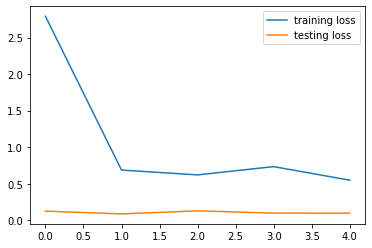

In [60]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='testing loss')
plt.legend()
plt.show()

### Looking the Accuracy in each class of FashionMNIST dataset

In [61]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(5):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy of Trouser: 97.70%
Accuracy of dress: 99.27%
Accuracy of sandle: 98.57%
Accuracy of sneaker: 97.10%
Accuracy of ankle boot: 94.23%


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


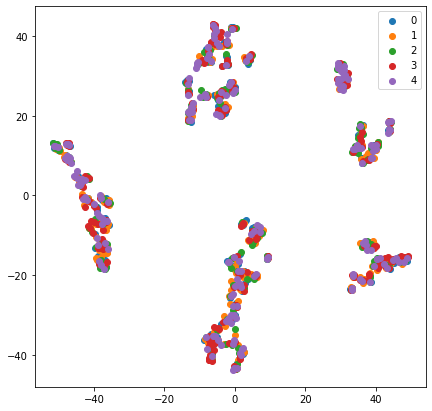

In [53]:
lt_embed = []
lt_lb = []
ln = 0 
with torch.no_grad():
  for img, lb in test_loader:
    embed = model(Variable(images.view(100, 1, 28, 28)))
    lt_embed.append(embed.cpu())
    lt_lb.append(lb)
    ln+=len(img)
    if(ln>=1000):
      break
embed_tensor = torch.cat(lt_embed)
label_tensor = torch.cat(lt_lb) 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(embed_tensor) 

import numpy as np
scatter_x = tsne_data[:,0]
scatter_y = tsne_data[:,1]
group = label_tensor

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],  label = g)
ax.legend()
plt.show()

### Printing the Confusion Matrix 

In [54]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [55]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    270000
           1       0.97      0.99      0.98    270000
           2       0.97      0.96      0.97    270000
           3       0.94      0.95      0.94    270000
           4       0.96      0.95      0.95    270000

    accuracy                           0.96   1350000
   macro avg       0.96      0.96      0.96   1350000
weighted avg       0.96      0.96      0.96   1350000




In [ ]:
labels_l

In [57]:
def accuracy(l, p):
    correct = 0
    for i in range(len(l)):
        if l[i] == p[i]:
            correct += 1
    return correct / len(l)

In [58]:
a=accuracy(labels_l, predictions_l)

In [59]:
a*100

96.47785185185185

# **Autoencoder**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [67]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [68]:

train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))  
                                             

In [69]:
def filter(train_dataset) : 
      

      new_train_target=[]
      for label in train_dataset.targets:
        if(label.item()==1):
          tensor = torch.tensor([0])
          new_train_target.append(tensor.squeeze(0))
        if(label.item()==3):
          tensor = torch.tensor([1])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==5):
          tensor = torch.tensor([2])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==7):
          tensor = torch.tensor([3])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==9):
          tensor = torch.tensor([4])
          new_train_target.append(tensor.squeeze(0))
          
        if(label.item()==0):
          tensor = torch.tensor([20])
          new_train_target.append(tensor.squeeze(0))
        if(label.item()==2):
          tensor = torch.tensor([21])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==4):
          tensor = torch.tensor([22])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==6):
          tensor = torch.tensor([23])
          new_train_target.append(tensor.squeeze(0))

        if(label.item()==8):
          tensor = torch.tensor([24])
          new_train_target.append(tensor.squeeze(0))


        train_dataset.targets=new_train_target  

      return train_dataset

In [70]:
train_set=filter(train_set)
test_set=filter(test_set)

In [71]:
indices=[]
l=[0,1,2,3,4]
for i in range(len(train_set.targets)):
  if(train_set.targets[i] in l ):
    indices.append(i)



In [72]:
len(indices)

30000

In [73]:
from torch.utils.data import Subset


subset = Subset(train_set, indices)

# Use the Subset as a dataset in your data loader
train_loader = torch.utils.data.DataLoader(subset, batch_size=100, shuffle=True)

In [74]:
indices=[]
l=[0,1,2,3,4]
for i in range(len(test_set.targets)):
  if(test_set.targets[i] in l ):
    indices.append(i)
subset2 = Subset(test_set, indices)  
test_loader = torch.utils.data.DataLoader(subset2, batch_size=100, shuffle=True)  


In [75]:
len(indices)

5000

In [76]:
def addnoise(tensor):
  return tensor + torch.randn(tensor.size()) * 0.3081 + 0.1307 

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms



# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            
        )
        
        self.decoder = nn.Sequential(
            
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.ReLU()
        )
        
    def forward(self, x):
        x=x.view(-1,28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the model and the optimizer
model = Autoencoder()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.MSELoss()

# Train the model
for epoch in range(10):
    for data in train_loader:
        img, _ = data


        noisy_img = addnoise(img)
        
        optimizer.zero_grad()
        output = model(noisy_img)
        loss = criterion(output, img.view(-1,28*28))
        loss.backward()
        optimizer.step()
        
    print("Epoch: {} Loss: {}".format(epoch, loss.item()))

Epoch: 0 Loss: 0.03277413547039032
Epoch: 1 Loss: 0.02590009570121765
Epoch: 2 Loss: 0.023731328547000885
Epoch: 3 Loss: 0.023477885872125626
Epoch: 4 Loss: 0.02047160640358925
Epoch: 5 Loss: 0.019423747435212135
Epoch: 6 Loss: 0.02007332630455494
Epoch: 7 Loss: 0.019281409680843353
Epoch: 8 Loss: 0.018520096316933632
Epoch: 9 Loss: 0.020396793261170387


In [78]:
from torchsummary import summary


summary(Autoencoder(), input_size=( 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
              ReLU-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
              ReLU-6                   [-1, 64]               0
            Linear-7                  [-1, 256]          16,640
              ReLU-8                  [-1, 256]               0
            Linear-9                  [-1, 512]         131,584
             ReLU-10                  [-1, 512]               0
           Linear-11                  [-1, 784]         402,192
             ReLU-12                  [-1, 784]               0
Total params: 1,100,112
Trainable params: 1,100,112
Non-trainable params: 0
---------------------------

In [79]:
# Remove the decoder part of the autoencoder
encoder = nn.Sequential(*list(model.children())[:-1])

# Define a new fully connected layer for the classification tas
classifier = nn.Sequential(
           nn.Linear(64,512),
            nn.Linear(512,5),
            nn.Softmax(dim=1)
        )

# Define a loss function and optimizer for the classification task
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(classifier.parameters()), lr=0.001)


# Train the classifier using the features from the encoder
losses=[]
test_losses = []
for epoch in range(20):
    r=0.0
    for data in train_loader:
        img, labels = data
      
        # Use the encoder to extract features from the images
        features = encoder(img.view(-1,28*28))
        # Forward pass
        output = classifier(features)
        # Compute the loss
        loss = criterion(output, labels)
        # Backward and optimize
        r=r+loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(r/64)    

    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
    
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, 50, loss.item()))

epoch [1/50], loss:7.1754
epoch [2/50], loss:7.1394
epoch [3/50], loss:7.1884
epoch [4/50], loss:7.1426
epoch [5/50], loss:7.1673
epoch [6/50], loss:7.1171
epoch [7/50], loss:7.3821
epoch [8/50], loss:7.2457
epoch [9/50], loss:7.2609
epoch [10/50], loss:7.1209
epoch [11/50], loss:7.3883
epoch [12/50], loss:7.2881
epoch [13/50], loss:7.3316
epoch [14/50], loss:7.9803
epoch [15/50], loss:7.6333
epoch [16/50], loss:7.7172
epoch [17/50], loss:8.0386
epoch [18/50], loss:7.7396
epoch [19/50], loss:8.0265
epoch [20/50], loss:8.0832


In [80]:
import matplotlib.pyplot as plt

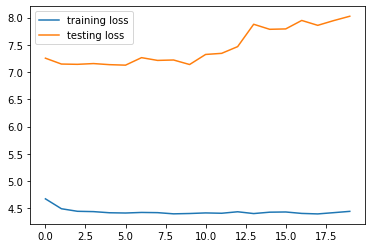

In [81]:
plt.plot(losses, label='training loss')
plt.plot(test_losses, label='testing loss')
plt.legend()
plt.show()

In [82]:
correct = 0
total = 0
losses=[]
with torch.no_grad():
    for data in test_loader:
        img, label = data
        features = encoder(img.view(-1,28*28))
        # Forward pass
        output = classifier(features)
        # Compute the loss
        
        loss = criterion(output, label)
        losses.append(loss.item())
        _, predicted = torch.max(output.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

print("Test accuracy: {:.2f}%".format(100 * correct / total))

Test accuracy: 95.98%


In [83]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


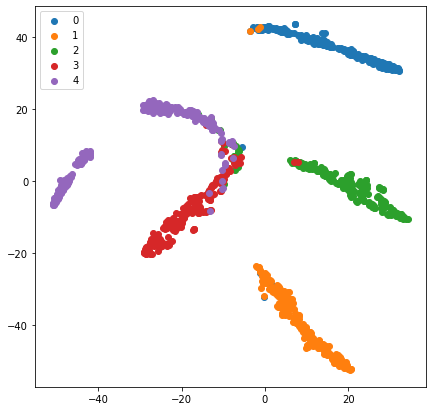

In [84]:
lt_embed = []
lt_lb = []
ln = 0 
with torch.no_grad():
  for img, lb in test_loader:
    embed = model.encoder(img.view(-1, 784))
    lt_embed.append(embed.cpu())
    lt_lb.append(lb)
    ln+=len(img)
    if(ln>=1000):
      break
embed_tensor = torch.cat(lt_embed)
label_tensor = torch.cat(lt_lb) 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(embed_tensor) 

import numpy as np
scatter_x = tsne_data[:,0]
scatter_y = tsne_data[:,1]
group = label_tensor

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],  label = g)
ax.legend()
plt.show()

### This is my implementation of deep learning in FashionMNIST dataset using Pytorch. I've achieved 93% test accuracy. Change those layer architecture or parameters to make it better. 
***I hope you like it. Give your feedback. It helps me to a lot. Thank you. :)***